In [1]:
from rlway.pyosrd.osrd import OSRD

from rlway_cpagent.cp_agent import CPAgent
from rlway.schedules import Schedule, schedule_from_osrd
from rlway_cpagent.osrd_adapter import regulation_problem_from_osrd

import nest_asyncio  
nest_asyncio.apply()

In [2]:
sim = OSRD(use_case='point_switch', dir='tmp')
sim.reset_delays()
sim.add_delay('train0', time_threshold=150, delay=800.)
regulated = sim.regulate(agent=CPAgent("cp_agent"))

[10:12:09,781] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[10:12:09,816] [INFO]              [FullInfra] parsing infra
[10:12:09,885] [INFO]              [FullInfra] adaptation to kotlin
[10:12:09,927] [INFO]              [FullInfra] loading signals
[10:12:09,933] [INFO]              [FullInfra] building blocks
[10:12:09,940] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[10:12:09,955] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.0
[10:12:10,010] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.1
[10:12:10,015] [INFO]  [StandaloneSimulationCommand] All simulations completed
[10:12:10,015] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/results.json
[10:12:10,615] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[10:12:10,643] [INFO]              [FullInfra] parsing infra
[10:12:10,706] [INFO]              [FullInfra] adaptation to k

In [3]:
regulation_problem_from_osrd(sim).__dict__

{'nb_trains': 2,
 'nb_zones': 4,
 'steps': [{'train': 1,
   'zone': 1,
   'prev': 0,
   'min_arrival': 0,
   'min_departure': 242,
   'min_duration': 1042,
   'is_fixed': False},
  {'train': 1,
   'zone': 2,
   'prev': 1,
   'min_arrival': 236,
   'min_departure': 247,
   'min_duration': 10,
   'is_fixed': True},
  {'train': 1,
   'zone': 3,
   'prev': 2,
   'min_arrival': 242,
   'min_departure': 450,
   'min_duration': 208,
   'is_fixed': True},
  {'train': 2,
   'zone': 4,
   'prev': 0,
   'min_arrival': 100,
   'min_departure': 342,
   'min_duration': 242,
   'is_fixed': False},
  {'train': 2,
   'zone': 2,
   'prev': 4,
   'min_arrival': 336,
   'min_departure': 347,
   'min_duration': 10,
   'is_fixed': True},
  {'train': 2,
   'zone': 1,
   'prev': 5,
   'min_arrival': 342,
   'min_departure': 550,
   'min_duration': 208,
   'is_fixed': True}]}

In [4]:
sim.trains

['train0', 'train1']

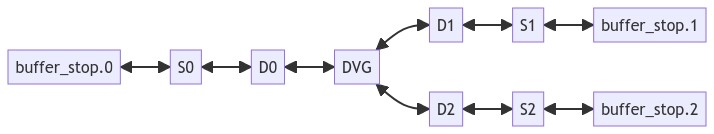

In [5]:
sim.draw_infra_points()

In [6]:
ref_schedule = schedule_from_osrd(sim)
delayed_schedule = schedule_from_osrd(sim.delayed())
regulated_schedule = schedule_from_osrd(regulated)

<Axes: xlabel='Time'>

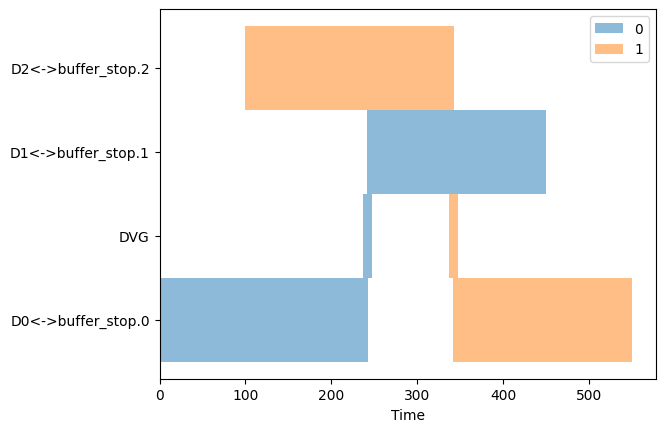

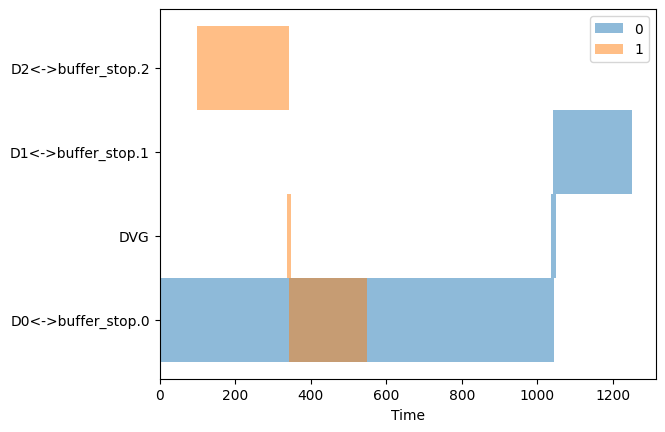

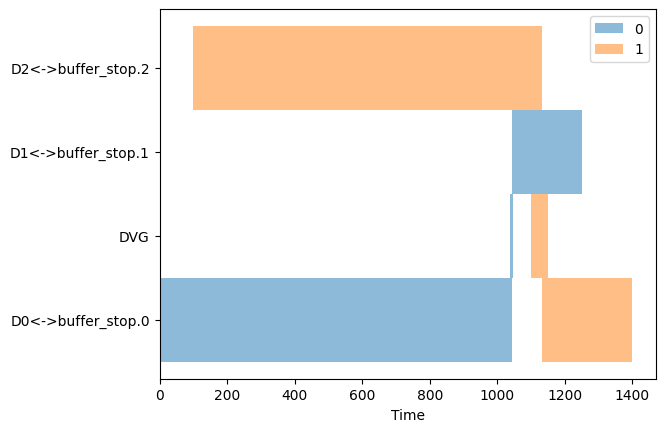

In [7]:
ref_schedule.plot()
delayed_schedule.plot()
regulated_schedule.plot()

In [8]:
print(ref_schedule.trajectory(0))
print(ref_schedule.trajectory(1))

['D0<->buffer_stop.0', 'DVG', 'D1<->buffer_stop.1']
['D2<->buffer_stop.2', 'DVG', 'D0<->buffer_stop.0']


<Axes: title={'center': 'train0 (base)'}, xlabel='Time [min]'>

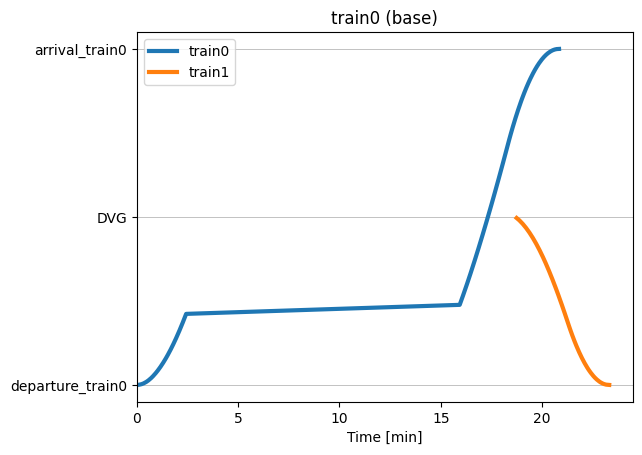

In [9]:
regulated.space_time_chart(0)